In [1]:
import pandas as pd # Fundamental data library
from matplotlib import pyplot as plt # Data plotting
%matplotlib inline
from sklearn.impute import SimpleImputer # Machine learning library
import sqlite3 as sql # We will use this library to make a connection to our database
from IPython.display import display # To display the dataframe for each table in a visually pleasing way
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)

Step 1. Cleaning socio data

In [3]:
socio_data = pd.read_csv('./Data/Sociography.csv')
df = socio_data

In [4]:
df.describe()


,plz_212,mtkaug,mtkaug_idx,mticmanagerhome_ind,mticdochome_ind,mticsoho_ind,mtfreieberufe_ind,bvvsaz,bvrsaz,bvhfraz,bvbffaz,bvhfhaz,mtstag,regio,regio_s,regio_z,mtwflq,mtgsfq,n_gebaeude,mtwflg,mtgsfg,garage,geb_fktg_31001_2460,geb_fktg_31001_2461,geb_fktg_31001_2462,geb_fktg_31001_2463,geb_fktg_31001_2465,geb_fktg_51009_1611,mtkdig,mtkleg,mtkgbg,mtkarg,mtkkwg,mtkmkg,mtkprg,mtkspg,mtkgeg,mtkemg,mtkoeg,mtkelg,mtkgag,mtkreg,mtkhpg,mtkhyg,mtkalg,mtkyng,mtkolg,mtke1g,mtke2g,mtke3g,mtke4g,mtke5g,mtke6g,mtke7g,mtke8g,mtke9g,mtfahrls,mtfahrlg,dladestm,dladestg,mtpozg,mtwizg,tec_scr,msinig,mssomg,msreig,msfubg,mscomg,mtphog,msaleg,msmuqg,mshkpg,mshkqg,mtbebg_0,mtbebg_1,mtbebg_2,mtbebg_3,mtbebg_4,mtbebg_5,mtaltg_1,mtaltg_2,mtaltg_3,mtaltg_4,mtaltg_5,mtaltg_6,mtaltg_7,mtaltg_8,mtitymg,mtitykg,ie22,geb_lage_1,geb_lage_2,geb_lage_3,geb_lage_4,geb_lage_5,geb_gro_1,geb_gro_2,geb_gro_3,mtggag_1,mtggag_2,mtggag_3,mtggag_4,mtggag_5,mtggag_6,mtggag_7,mtggag_8,mtggag_9,mtggag_10,mtggag_11,mtggag_12,mtggag_13,kinderg,msokag,oekostromg,vamehrg,umwelt_antriebg,umwelt_autog,mtklmg,mtkklg,mtkklg6,mtkcpg,mtkcmg,mtkcbg,mtkglg,mtkvkg,mtkmvg,mtkmsg,mtkksg,mtkgsg,mtka1k_0,mtka1k_1,mtka1k_2,mtka1k_3,mtka1k_4,mtka1k_5,mtka1k_6,mtka1k_7,mtka1k_8,mtka1k_9,mtka1k_10,mtka1k_11,mtka1k_12,mtka1k_13,mtka1k_14,mtka1k_15,mtka1k_16,mtka1k_17,mtka1k_18,mtka1k_19,mtka1k_20,mtka1k_21,mtka1k_22,mtka1k_23,mtka1k_24,mtka1k_25,mtk01g,mtk02g,mtk04g,mtk05g,mtk06g,mtk07g,mtk08g,mtk09g,mtk11g,mtk12g,mtk13g,mtk14g,mtk16g,mtk17g,mtk18g,mtk19g,mtk22g,mtk23g,hh22,bvto_kgs22,bvto_hh,mthhdg,mtizae_1,mtizae_2,mtizae_0,sb_ep,sum_bvto_kgs_22,sum_n_gebaeude,socio_index_weight,home_index_weight,avg_household_weight,avg_age,avg_age_weight,educational_level_index_weight,social_status_index,one_two_family_home_index,avg_household_german,avg_age_german,educational_level_index,stab_number
count,25946.000000,25946.000000,25946.00000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,2.594600e+04,2.594600e+04,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25932.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.000000,25946.00000,25946.000000,25946.00000

In [5]:
df.drop(df.index[df['mtkaug'] == -99], inplace=True)
df.drop(df.index[df['dladestm'] == -99], inplace=True)
df.drop(df.index[df['mtkelg'] == 0], inplace=True)
df.drop(df.index[df['mtkaug_idx'] == 0], inplace=True)

In [6]:
df.describe()


,plz_212,mtkaug,mtkaug_idx,mticmanagerhome_ind,mticdochome_ind,mticsoho_ind,mtfreieberufe_ind,bvvsaz,bvrsaz,bvhfraz,bvbffaz,bvhfhaz,mtstag,regio,regio_s,regio_z,mtwflq,mtgsfq,n_gebaeude,mtwflg,mtgsfg,garage,geb_fktg_31001_2460,geb_fktg_31001_2461,geb_fktg_31001_2462,geb_fktg_31001_2463,geb_fktg_31001_2465,geb_fktg_51009_1611,mtkdig,mtkleg,mtkgbg,mtkarg,mtkkwg,mtkmkg,mtkprg,mtkspg,mtkgeg,mtkemg,mtkoeg,mtkelg,mtkgag,mtkreg,mtkhpg,mtkhyg,mtkalg,mtkyng,mtkolg,mtke1g,mtke2g,mtke3g,mtke4g,mtke5g,mtke6g,mtke7g,mtke8g,mtke9g,mtfahrls,mtfahrlg,dladestm,dladestg,mtpozg,mtwizg,tec_scr,msinig,mssomg,msreig,msfubg,mscomg,mtphog,msaleg,msmuqg,mshkpg,mshkqg,mtbebg_0,mtbebg_1,mtbebg_2,mtbebg_3,mtbebg_4,mtbebg_5,mtaltg_1,mtaltg_2,mtaltg_3,mtaltg_4,mtaltg_5,mtaltg_6,mtaltg_7,mtaltg_8,mtitymg,mtitykg,ie22,geb_lage_1,geb_lage_2,geb_lage_3,geb_lage_4,geb_lage_5,geb_gro_1,geb_gro_2,geb_gro_3,mtggag_1,mtggag_2,mtggag_3,mtggag_4,mtggag_5,mtggag_6,mtggag_7,mtggag_8,mtggag_9,mtggag_10,mtggag_11,mtggag_12,mtggag_13,kinderg,msokag,oekostromg,vamehrg,umwelt_antriebg,umwelt_autog,mtklmg,mtkklg,mtkklg6,mtkcpg,mtkcmg,mtkcbg,mtkglg,mtkvkg,mtkmvg,mtkmsg,mtkksg,mtkgsg,mtka1k_0,mtka1k_1,mtka1k_2,mtka1k_3,mtka1k_4,mtka1k_5,mtka1k_6,mtka1k_7,mtka1k_8,mtka1k_9,mtka1k_10,mtka1k_11,mtka1k_12,mtka1k_13,mtka1k_14,mtka1k_15,mtka1k_16,mtka1k_17,mtka1k_18,mtka1k_19,mtka1k_20,mtka1k_21,mtka1k_22,mtka1k_23,mtka1k_24,mtka1k_25,mtk01g,mtk02g,mtk04g,mtk05g,mtk06g,mtk07g,mtk08g,mtk09g,mtk11g,mtk12g,mtk13g,mtk14g,mtk16g,mtk17g,mtk18g,mtk19g,mtk22g,mtk23g,hh22,bvto_kgs22,bvto_hh,mthhdg,mtizae_1,mtizae_2,mtizae_0,sb_ep,sum_bvto_kgs_22,sum_n_gebaeude,socio_index_weight,home_index_weight,avg_household_weight,avg_age,avg_age_weight,educational_level_index_weight,social_status_index,one_two_family_home_index,avg_household_german,avg_age_german,educational_level_index,stab_number
count,25774.000000,25774.000000,25774.00000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,2.577400e+04,2.577400e+04,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.00000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.00000,25774.000000,25774.000000,25764.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000

In [7]:
df = df.loc[:,('plz_212', 'mtkaug_idx', 'bvvsaz', 'mtkgbg', 'mtkarg', 'mtkkwg','mtkmkg', 'mtkgeg', 'mtkemg', 'mtkoeg', 'mtkelg', 'mtkreg', 'mtkhpg',
               'mtkhyg', 'mtkyng', 'mtkolg', 'mtfahrls', 'dladestm', 'mtitymg', 
               'mtitykg', 'mtkcpg',
               'mtkcmg', 'mtkcbg', 'mtkglg', 'mtkvkg', 'mtkmvg', 'mtkmsg', 
               'mtkksg', 'mtkgsg', 'sb_ep', 'educational_level_index_weight', 
               'one_two_family_home_index') ]

We should format the postal code to look like postal codes right now it looks like 10202.0 or 3049.0 if it starts with zero.

In [8]:
df['plz_212'] = df['plz_212'].astype(str).replace('\.0', '', regex=True)
df['plz_212'] = df['plz_212'].astype(str).str.zfill(5)
df['plz_212'].astype(str)

0        01109
1        01187
2        01277
3        01454
4        01454
         ...  
25947    99880
25948    99958
25949    99958
25950    99998
25951    99998
Name: plz_212, Length: 25780, dtype: object

Stab_number column is unnecessary and creates duplicates in the data. 

In [9]:
#df.drop(columns=['stab_number'], inplace=True)
df.drop_duplicates(inplace=True)
df = df.rename({'plz_212': 'zipcode'}, axis ='columns')
df.zipcode.describe()

count      8105
unique     8105
top       26506
freq          1
Name: zipcode, dtype: object

There are cells with -99 and those are NaN as well. Need to replace them with NaN and then later delete those rows.

In [10]:
df = df.dropna(axis='rows')

In [11]:
#df.to_csv (r'./Data/Sociography_clean.csv', index = False, header=True)

Step 2. Cluster analysis with geographical sociographic data

In [12]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import seaborn as sns

In [13]:
np.set_printoptions(precision=4, suppress= True)
plt.figure(figsize=(15,7))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [14]:
df['shareSUV'] = (df['mtkmsg'] + df['mtkksg'] + df['mtkgsg'])/3

In [15]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                mtkaug_idx    bvvsaz    mtkgbg    mtkarg  \
mtkaug_idx                        1.000000  0.055983 -0.368886  0.231302   
bvvsaz                            0.055983  1.000000 -0.072829 -0.379839   
mtkgbg                           -0.368886 -0.072829  1.000000 -0.157901   
mtkarg                            0.231302 -0.379839 -0.157901  1.000000   
mtkkwg                           -0.010548  0.457752 -0.230505 -0.366232   
mtkmkg                           -0.301188 -0.419429  0.281126  0.220937   
mtkgeg                            0.209907  0.194226 -0.101778 -0.058717   
mtkemg                           -0.164261  0.075677  0.459762 -0.385695   
mtkoeg                            0.296254  0.297873 -0.241576 -0.162071   
mtkelg                            0.524989  0.159658 -0.454619  0.087218   
mtkreg                            0.519501 -0.065191 -0.204044  0.221229   
mtkhpg                            0.455961  0.086188 -0.365383  0.146603   
mtkhyg      

Text(0.5, 1.0, 'Sociography data variable correlation Heatmap')

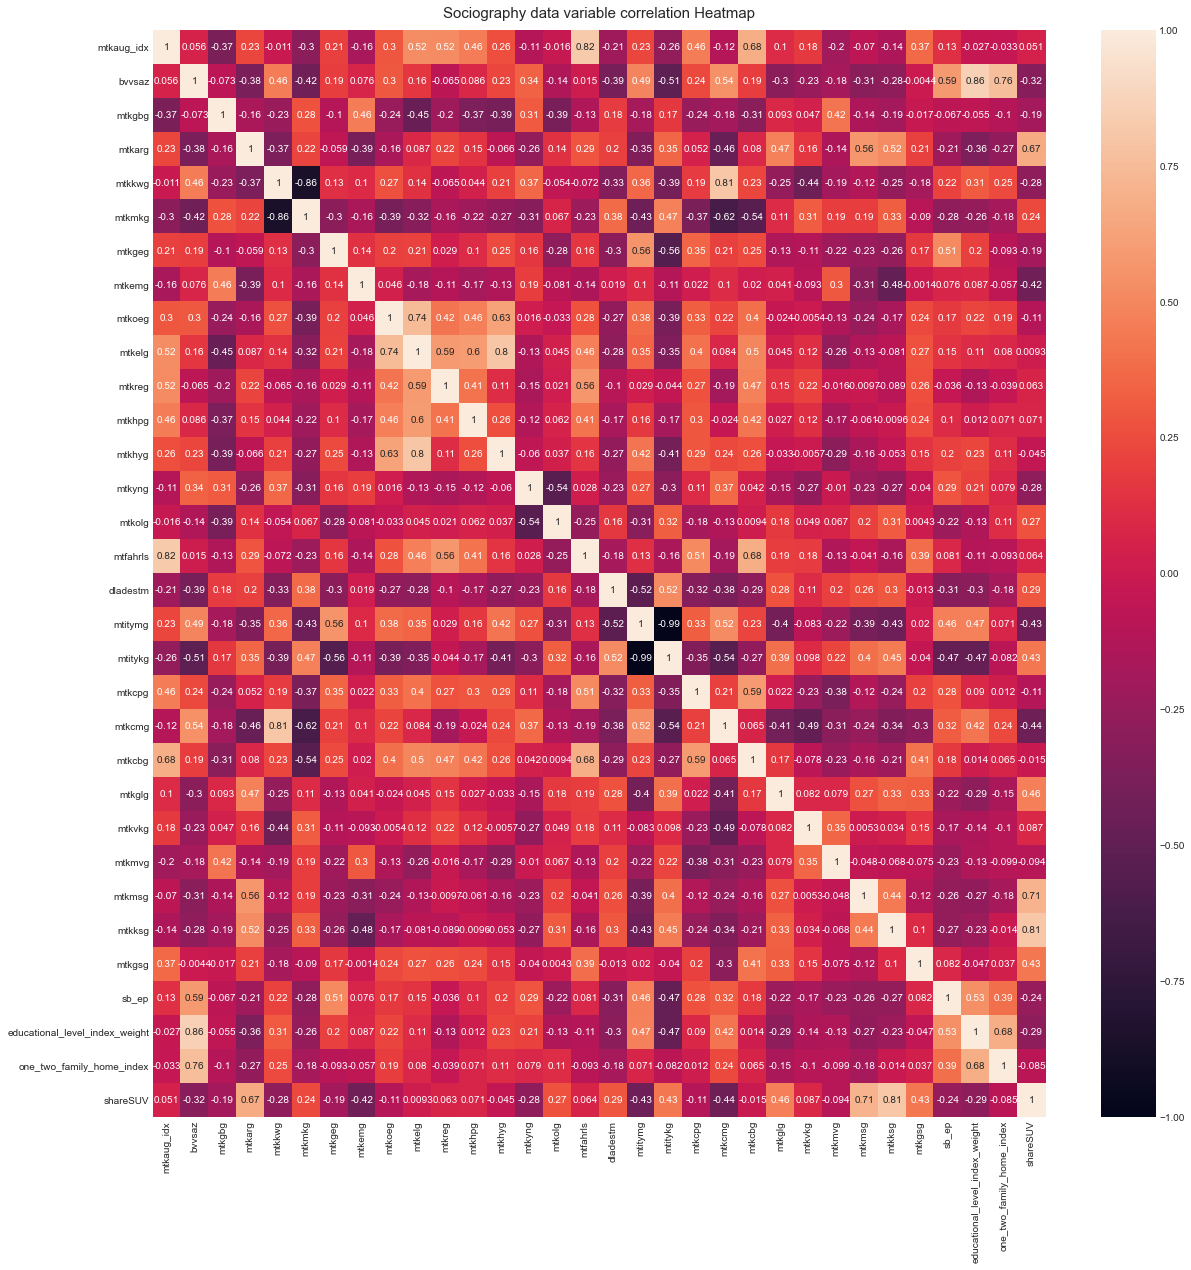

In [16]:
plt.figure(figsize=(20, 20))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Sociography data variable correlation Heatmap', fontdict={'fontsize':15}, pad=12)

Final stage of data preparation is to scale the data for cluster analysis

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
df[['mtkaug_idx', 'bvvsaz', 'mtkgbg', 'mtkarg', 'mtkkwg','mtkmkg', 
    'mtkgeg', 'mtkemg', 'mtkoeg', 'mtkelg', 'mtkreg', 'mtkhpg','mtkhyg', 
    'mtkyng', 'mtkolg', 'mtfahrls', 'dladestm', 'mtitymg', 'mtitykg', 'mtkcpg',
    'mtkcmg', 'mtkcbg', 'mtkglg', 'mtkvkg', 'mtkmvg', 'mtkmsg', 'mtkksg', 'mtkgsg',
    'sb_ep', 'educational_level_index_weight', 'one_two_family_home_index', 'shareSUV']] = scaler.fit_transform(df[['mtkaug_idx', 'bvvsaz', 'mtkgbg', 'mtkarg', 'mtkkwg','mtkmkg', 
                        'mtkgeg', 'mtkemg', 'mtkoeg', 'mtkelg', 'mtkreg', 'mtkhpg','mtkhyg', 
                        'mtkyng', 'mtkolg', 'mtfahrls', 'dladestm', 'mtitymg', 'mtitykg', 'mtkcpg',
                        'mtkcmg', 'mtkcbg', 'mtkglg', 'mtkvkg', 'mtkmvg', 'mtkmsg', 'mtkksg', 'mtkgsg', 
                        'sb_ep', 'educational_level_index_weight', 'one_two_family_home_index', 'shareSUV']])


In [19]:
df

,zipcode,mtkaug_idx,bvvsaz,mtkgbg,mtkarg,mtkkwg,mtkmkg,mtkgeg,mtkemg,mtkoeg,mtkelg,mtkreg,mtkhpg,mtkhyg,mtkyng,mtkolg,mtfahrls,dladestm,mtitymg,mtitykg,mtkcpg,mtkcmg,mtkcbg,mtkglg,mtkvkg,mtkmvg,mtkmsg,mtkksg,mtkgsg,sb_ep,educational_level_index_weight,one_two_family_home_index,shareSUV
0,01109,0.142463,0.136052,0.35625,0.335378,0.272000,0.75000,0.040,0.41250,0.477387,0.336016,0.077810,0.0500,0.354,0.279101,0.554974,0.118714,0.028570,0.637987,0.374784,0.256,0.335917,0.194,0.264,0.633124,0.500000,0.104,0.368635,0.220,0.069035,0.120857,0.190372,0.272438
1,01187,0.167852,0.117375,0.43625,0.353783,0.236000,0.80250,0.068,0.42625,0.492462,0.396378,0.092219,0.0725,0.378,0.468254,0.369110,0.186833,0.021173,0.826299,0.281520,0.284,0.273902,0.222,0.224,0.551363,0.487288,0.134,0.281059,0.198,0.043687,0.091612,0.050787,0.241461
2,01277,0.170497,0.218928,0.39750,0.284254,0.386667,0.70500,0.066,0.39500,0.442211,0.334004,0.031700,0.0275,0.400,0.456349,0.473822,0.161771,0.015068,0.876623,0.155440,0.268,0.467700,0.194,0.238,0.486373,0.466102,0.108,0.327902,0.144,0.079251,0.319291,0.043517,0.227959
3,01454,0.183955,0.197110,0.39000,0.400818,0.406667,0.69500,0.030,0.46250,0.371859,0.247485,0.083573,0.0600,0.230,0.403439,0.497382,0.176810,0.044062,0.501623,0.514680,0.252,0.403101,0.186,0.236,0.496855,0.427966,0.130,0.425662,0.276,0.247833,0.152276,0.260165,0.327244
5,01587,0.135057,0.104752,0.29250,0.239264,0.477333,0.70000,0.040,0.52250,0.505025,0.348089,0.000000,0.0200,0.450,0.392857,0.761780,0.032709,0.011809,0.788961,0.262522,0.182,0.664083,0.092,0.260,0.394130,0.417373,0.072,0.468432,0.112,0.080025,0.042542,0.045126,0.255759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,99759,0.114781,0.036098,0.52500,0.580777,0.396000,0.72625,0.012,0.27250,0.376884,0.162978,0.072046,0.0450,0.150,0.482804,0.505236,0.096968,0.050390,0.207792,0.789292,0.208,0.348837,0.142,0.464,0.446541,0.514831,0.368,0.684318,0.304,0.012401,0.006186,0.082567,0.533757
12969,99831,0.158331,0.037583,0.48375,0.695297,0.324000,0.76500,0.024,0.14750,0.381910,0.235412,0.121037,0.1025,0.158,0.462963,0.501309,0.182450,0.168200,0.185065,0.822107,0.228,0.271318,0.148,0.520,0.532495,0.408898,0.300,0.773931,0.240,0.031810,0.006980,0.086254,0.516283
12970,99880,0.145048,0.134567,0.45750,0.539877,0.406667,0.67750,0.022,0.28000,0.447236,0.251509,0.118156,0.0675,0.228,0.466931,0.552356,0.121566,0.046382,0.248377,0.740933,0.266,0.374677,0.194,0.322,0.492662,0.514831,0.260,0.610998,0.244,0.133996,0.092011,0.270966,0.438443
12972,99958,0.092507,0.025817,0.59125,0.427403,0.250667,0.81875,0.010,0.37750,0.381910,0.181087,0.083573,0.0000,0.204,0.498677,0.410995,0.166746,0.148460,0.121753,0.872193,0.358,0.240310,0.180,0.402,0.526205,0.574153,0.200,0.684318,0.212,0.007509,0.003826,0.064548,0.430500


Goal 1. Identify zipcodes with high demand for Compact e-cars

Find unrelated variables using a correlation matrix. 

In [20]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df.loc[:, ('mtkaug_idx', 'mtkelg', 'mtkcmg')].values)
len(y_predicted)
y_predicted = y_predicted.tolist()
#distance to charging station, annual mileage, inclination towards electric hybrid

In [21]:
pd.options.mode.chained_assignment = None

In [22]:
df['cluster_eCompact'] = y_predicted
#adding cluster results as a new column

In [23]:
customers1 = df[df.cluster_eCompact==0]
customers2 = df[df.cluster_eCompact==1]
customers3 = df[df.cluster_eCompact==2]



In [24]:
customers1.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,2369.000000,2369.000000,2369.000000
mean,0.293430,0.594602,0.191837
std,0.078472,0.095303,0.053066
min,0.000000,0.444444,0.039671
25%,0.243461,0.521964,0.152336
50%,0.289738,0.573643,0.188775
75%,0.344064,0.651163,0.226624
max,0.798793,1.000000,0.446723


In [25]:
customers2.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,2350.000000,2350.000000,2350.000000
mean,0.402017,0.374778,0.272533
std,0.078134,0.085630,0.076021
min,0.213280,0.186047,0.060594
25%,0.346076,0.317829,0.225301
50%,0.388330,0.383721,0.266471
75%,0.444165,0.439276,0.311181
max,1.000000,0.599483,1.000000


In [26]:
customers3.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,3385.000000,3385.000000,3385.000000
mean,0.220805,0.326775,0.181805
std,0.063305,0.081468,0.050604
min,0.004024,0.000000,0.000000
25%,0.181087,0.266150,0.146870
50%,0.225352,0.330749,0.181134
75%,0.267606,0.392765,0.214575
max,0.392354,0.509044,0.406230


In [27]:
#The result does not seem to produce our preferred segment which has high preference for hybrid/electric cars and high share of compact cars
#We decided to filter the data to see only top 50% for "mtkelg" variable
df['mtkelg'].describe()

count    8104.000000
mean        0.294583
std         0.104233
min         0.000000
25%         0.223340
50%         0.287726
75%         0.360161
max         1.000000
Name: mtkelg, dtype: float64

In [28]:
df_e = df[df['mtkelg']>=.287726]

#Filtering to represent more than average preference
#Now we are segmenting among regions showing more than average preference for electric/hybrid cars.

In [29]:
df_ne = df[df['mtkelg'] <.287726]
df_ne.describe()

,mtkaug_idx,bvvsaz,mtkgbg,mtkarg,mtkkwg,mtkmkg,mtkgeg,mtkemg,mtkoeg,mtkelg,mtkreg,mtkhpg,mtkhyg,mtkyng,mtkolg,mtfahrls,dladestm,mtitymg,mtitykg,mtkcpg,mtkcmg,mtkcbg,mtkglg,mtkvkg,mtkmvg,mtkmsg,mtkksg,mtkgsg,sb_ep,educational_level_index_weight,one_two_family_home_index,shareSUV,cluster_eCompact
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4.043000e+03,4043.000000,4043.000000,4043.000000
mean,0.180694,0.121106,0.568313,0.496407,0.454356,0.592302,0.022783,0.501841,0.383247,0.212594,0.104426,0.056102,0.181847,0.510390,0.489370,0.303762,0.082948,0.301350,0.678653,0.336876,0.405536,0.332475,0.408895,0.409198,0.455641,0.221369,0.475174,0.284352,0.045786,3.954373e-02,0.113817,0.386156,1.426416
std,0.052635,0.122274,0.140421,0.187571,0.152960,0.150152,0.028246,0.156153,0.103319,0.054020,0.078948,0.047530,0.063474,0.135101,0.118109,0.135704,0.074472,0.191176,0.204150,0.103951,0.147262,0.123987,0.126325,0.113130,0.141146,0.140015,0.138963,0.102076,0.074215,7.300517e-02,0.101855,0.100591,0.899565
min,0.000000,0.000171,0.028750,0.000000,0.000000,0.085000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006545,0.000000,0.000511,0.000000,0.015544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.976096e-08,0.000000,0.000000,0.000000
25%,0.143432,0.034841,0.473750,0.351738,0.348000,0.486250,0.012000,0.393750,0.319095,0.183099,0.043228,0.012500,0.141000,0.416667,0.422120,0.210335,0.029503,0.161526,0.592401,0.261000,0.297158,0.234000,0.322000,0.331237,0.362288,0.120000,0.384929,0.216000,0.006394,1.434596e-03,0.041595,0.318507,0.000000
50%,0.179371,0.072253,0.570000,0.464213,0.448000,0.598750,0.018000,0.502500,0.374372,0.223340,0.095101,0.055000,0.184000,0.505291,0.493455,0.318994,0.058576,0.251623,0.732297,0.334000,0.385013,0.340000,0.396000,0.400419,0.438559,0.194000,0.464358,0.274000,0.019591,7.639234e-03,0.084125,0.378078,2.000000
75%,0.213165,0.168866,0.663750,0.601227,0.553333,0.703750,0.024000,0.607500,0.437186,0.255533,0.155620,0.085000,0.226000,0.600529,0.561518,0.399445,0.119859,0.383117,0.827288,0.406000,0.490956,0.418000,0.480000,0.475891,0.540254,0.292000,0.556008,0.338000,0.051890,4.458882e-02,0.150698,0.444003,2.000000
max,0.513900,0.928947,1.000000,1.000000,1.000000,1.000000,0.844000,1.000000,0.919598,0.285714,0.561960,0.500000,0.400000,1.000000,0.942408,0.991099,1.000000,1.000000,1.000000,1.000000,0.961240,0.972000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,0.961080,2.000000


In [30]:
#We decreased the number of clusters to two because the other filtered zip codes with low preference for electric/hybrid cars would make one segment. 
km = KMeans(n_clusters=2)

y_predicted2 = km.fit_predict(df_e.loc[:, ('mtkaug_idx', 'mtkelg', 'mtkcmg')].values)
y_predicted2 = y_predicted2.tolist()
#distance to charging station, inclination towards electric hybrid, share of compact cars

In [31]:
df_e['cluster_eCompact2'] = y_predicted2
#adding cluster results as a new column

In [32]:
customers21 = df_e[df_e.cluster_eCompact2==0]
customers22 = df_e[df_e.cluster_eCompact2==1]
#customers23 = df_e[df_e.cluster_eCompact2==2]


In [33]:
customers21.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe() #high group

,mtkelg,mtkcmg,mtkaug_idx
count,1630.000000,1630.000000,1630.000000
mean,0.363768,0.569054,0.219002
std,0.061042,0.091104,0.060693
min,0.287726,0.428941,0.042198
25%,0.317907,0.496124,0.173861
50%,0.352113,0.550388,0.214987
75%,0.394366,0.620155,0.262695
max,0.798793,1.000000,0.446723


In [34]:
customers22.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,2431.000000,2431.000000,2431.000000
mean,0.384552,0.340737,0.256194
std,0.079900,0.076252,0.080072
min,0.287726,0.186047,0.030385
25%,0.321932,0.284238,0.203438
50%,0.368209,0.348837,0.247194
75%,0.426559,0.403101,0.297385
max,1.000000,0.478036,1.000000


In [35]:
df_ne.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,4043.000000,4043.000000,4043.000000
mean,0.212594,0.405536,0.180694
std,0.054020,0.147262,0.052635
min,0.000000,0.000000,0.000000
25%,0.183099,0.297158,0.143432
50%,0.223340,0.385013,0.179371
75%,0.255533,0.490956,0.213165
max,0.285714,0.961240,0.513900


Goal 2. Identify zipcodes with high demand for e-SUVs

In [36]:
km = KMeans(n_clusters=2)

y_predicted3 = km.fit_predict(df_e.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].values)
len(y_predicted3)
y_predicted3 = y_predicted3.tolist()


In [37]:
df_e['cluster_eSUV'] = y_predicted3

In [38]:
customers31 = df_e[df_e.cluster_eSUV==0]
customers32 = df_e[df_e.cluster_eSUV==1]


In [39]:
customers31.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].describe()

,mtkelg,shareSUV,mtkaug_idx,dladestm
count,2704.000000,2704.000000,2704.000000,2704.000000
mean,0.353382,0.339925,0.222171,0.043968
std,0.051844,0.054913,0.059550,0.041034
min,0.287726,0.127879,0.030385,0.000000
25%,0.311871,0.305004,0.178548,0.016759
50%,0.342052,0.342335,0.220482,0.029792
75%,0.382294,0.378078,0.262959,0.056157
max,0.756539,0.505957,0.480223,0.373766


In [40]:
customers32.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].describe()

,mtkelg,shareSUV,mtkaug_idx,dladestm
count,1357.000000,1357.000000,1357.000000,1357.000000
mean,0.421696,0.466066,0.279316,0.065357
std,0.088093,0.085949,0.087554,0.058860
min,0.287726,0.231136,0.087511,0.000330
25%,0.356137,0.409849,0.222039,0.023589
50%,0.406439,0.451946,0.268998,0.047418
75%,0.472837,0.505163,0.328769,0.093339
max,1.000000,1.000000,1.000000,0.502452


In [57]:
df_ne.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].describe()

,mtkelg,shareSUV,mtkaug_idx,dladestm
count,4043.000000,4043.000000,4043.000000,4043.000000
mean,0.212594,0.386156,0.180694,0.082948
std,0.054020,0.100591,0.052635,0.074472
min,0.000000,0.000000,0.000000,0.000511
25%,0.183099,0.318507,0.143432,0.029503
50%,0.223340,0.378078,0.179371,0.058576
75%,0.255533,0.444003,0.213165,0.119859
max,0.285714,0.961080,0.513900,1.000000


In [41]:
df_e.to_csv (r'./Data/Socio_clusters_2segments.csv', index = False, header=True)

To see if there is a better clustering method, we also tried to use GMM. Trying to use GMM. Gausian Mixed Models
https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

In [42]:
df_gmm = df_e[['mtkelg', 'mtkcmg', 'mtkaug_idx']]

In [43]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df_gmm)

GaussianMixture(n_components=2)

In [44]:
y_predicted4 = gmm.predict(df_gmm)
df_gmm = pd.DataFrame(df_gmm)
df_gmm['cluster'] = y_predicted4



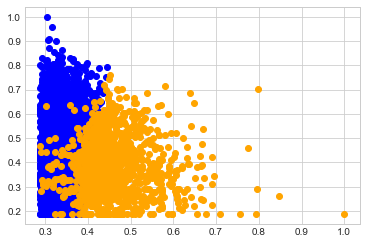

In [45]:
color=['blue','orange']
for k in range(0,2):
    data = df_gmm[df_gmm["cluster"]==k]
    plt.scatter(data["mtkelg"],data['mtkcmg'],c=color[k])
plt.show()


In [46]:
customers41 = df_gmm[df_gmm.cluster==0]
customers42 = df_gmm[df_gmm.cluster==1]


In [47]:
customers41.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,2740.000000,2740.000000,2740.000000
mean,0.337721,0.452848,0.220562
std,0.032778,0.145297,0.052675
min,0.287726,0.186047,0.071643
25%,0.309859,0.346253,0.181120
50%,0.334004,0.444444,0.221510
75%,0.364185,0.552972,0.259536
max,0.444668,1.000000,0.365971


In [48]:
customers42.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,1321.000000,1321.000000,1321.000000
mean,0.456041,0.389921,0.284210
std,0.070625,0.114023,0.094228
min,0.287726,0.186047,0.030385
25%,0.412475,0.307494,0.221746
50%,0.442656,0.387597,0.281222
75%,0.484909,0.465116,0.342639
max,1.000000,0.759690,1.000000


In [60]:
df_ne.loc[:, ('mtkelg', 'mtkcmg', 'mtkaug_idx')].describe()

,mtkelg,mtkcmg,mtkaug_idx
count,4043.000000,4043.000000,4043.000000
mean,0.212594,0.405536,0.180694
std,0.054020,0.147262,0.052635
min,0.000000,0.000000,0.000000
25%,0.183099,0.297158,0.143432
50%,0.223340,0.385013,0.179371
75%,0.255533,0.490956,0.213165
max,0.285714,0.961240,0.513900


In [49]:
df_gmm2 = df_e[['mtkelg','shareSUV', 'mtkaug_idx', 'dladestm']]

In [50]:
gmm.fit(df_gmm2)

GaussianMixture(n_components=2)

In [51]:
y_predicted5 = gmm.predict(df_gmm2)
df_gmm2 = pd.DataFrame(df_gmm2)
df_gmm2['cluster'] = y_predicted5


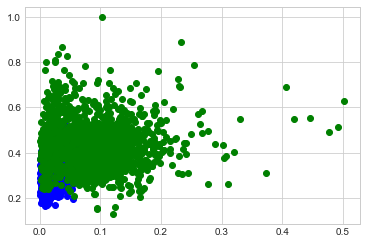

In [52]:
color=['blue','green']
for k in range(0,2):
    data = df_gmm2[df_gmm2["cluster"]==k]
    plt.scatter(data["dladestm"],data['shareSUV'],c=color[k])
plt.show()


In [58]:
customers51 = df_gmm2[df_gmm2.cluster==0]
customers52 = df_gmm2[df_gmm2.cluster==1]


In [54]:
customers51.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].describe()

,mtkelg,shareSUV,mtkaug_idx,dladestm
count,2536.000000,2536.000000,2536.000000,2536.000000
mean,0.357827,0.352941,0.232943,0.027355
std,0.048830,0.062809,0.064138,0.015843
min,0.287726,0.163622,0.071643,0.000000
25%,0.317907,0.311954,0.184308,0.014957
50%,0.350101,0.351867,0.232060,0.024766
75%,0.390342,0.395552,0.275580,0.037902
max,0.498994,0.530580,0.472465,0.072928


In [55]:
customers52.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].describe()

,mtkelg,shareSUV,mtkaug_idx,dladestm
count,1525.000000,1525.000000,1525.000000,1525.000000
mean,0.406779,0.430523,0.255107,0.090627
std,0.094738,0.105032,0.088863,0.058490
min,0.287726,0.127879,0.030385,0.000710
25%,0.327968,0.358221,0.196885,0.052798
50%,0.388330,0.416203,0.242081,0.086433
75%,0.468813,0.490071,0.298266,0.120029
max,1.000000,1.000000,1.000000,0.502452


In [59]:
df_ne.loc[:, ('mtkelg','shareSUV', 'mtkaug_idx', 'dladestm')].describe()

,mtkelg,shareSUV,mtkaug_idx,dladestm
count,4043.000000,4043.000000,4043.000000,4043.000000
mean,0.212594,0.386156,0.180694,0.082948
std,0.054020,0.100591,0.052635,0.074472
min,0.000000,0.000000,0.000000,0.000511
25%,0.183099,0.318507,0.143432,0.029503
50%,0.223340,0.378078,0.179371,0.058576
75%,0.255533,0.444003,0.213165,0.119859
max,0.285714,0.961080,0.513900,1.000000


In [61]:
df_e.to_csv (r'./Data/Cluster_results_Kmeans.csv', index = False, header=True)